In [1]:
df = pd.read_parquet('walmart.parquet')

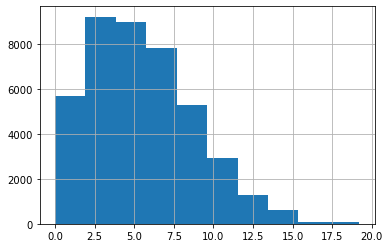

In [2]:
df['fuel_price_avg'].hist()

In [3]:
from scipy import stats

df['fuel_price_avg'].min()

0.0

In [4]:
df['fuel_price_avg'] += 1.0
df['fuel_price_avg'].min()

1.0

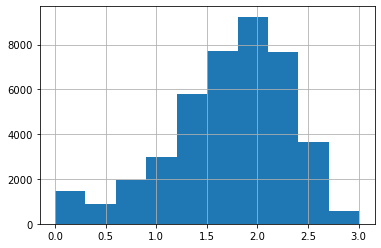

In [5]:
v = stats.boxcox(df['fuel_price_avg'], lmbda=0)
pd.Series(v).hist()

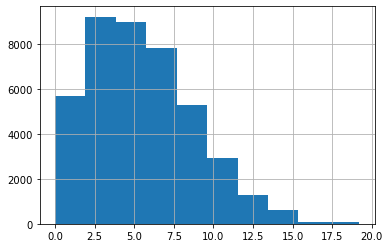

In [6]:
v = stats.boxcox(df['fuel_price_avg'], lmbda=1)
pd.Series(v).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9879688cf8>]],
      dtype=object)

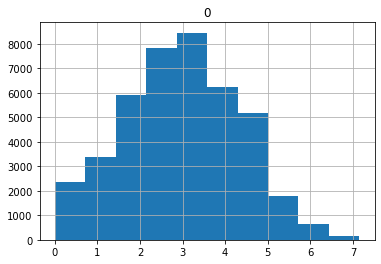

In [25]:
# Use maximum likelihood estimation
actual = pd.DataFrame(stats.boxcox(df['fuel_price_avg'])[0])
actual.hist()

In [27]:
# Checks a normal Q-Q plot (probability plot)
rk = np.array(actual.rank(method='first', na_option='keep') / actual.count())
expected = stats.norm.ppf(rk, loc=0, scale=1)

In [64]:
df = pd.DataFrame({"actual" : actual[0].values, "ppf" : expected.flatten()})

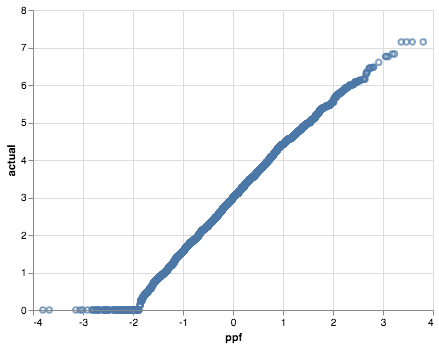

In [65]:
import altair as alt

alt.Chart(df.sample(n=5000)).mark_point().encode(x='ppf', y='actual')